In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

import torch

In [81]:
N   = np.random.randint(75,125)
fov = 10
sig = .05
means = np.random.uniform(-fov/2, fov/2, size=(N, 2))
x_sigma = np.random.uniform(0, sig, size=N)
y_sigma = np.random.uniform(0, sig, size=N)
xy_sigma = np.random.uniform(0, sig, size=N)

In [83]:
dim = 2
covariances = np.zeros((len(means), dim,dim)) + np.identity(dim)
covariances[:,0,0] = x_sigma
covariances[:,1,1] = y_sigma
covariances[:,0,1] = 0 #xy_sigma
covariances[:,1,0] = 0

# Define mixing coefficients (weights)
weights = np.zeros(len(means)) + 1/len(means)  # Replace with actual values

# Ensure that weights sum to 1
weights /= weights.sum()

# Create Gaussian Mixture Model
gmm = GaussianMixture(n_components=len(means), covariance_type='full')
gmm.weights_ = weights
gmm.means_ = means
gmm.covariances_ = covariances
gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covariances))

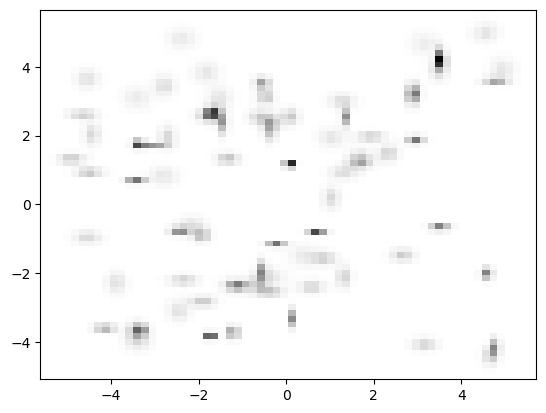

In [84]:
samples = gmm.sample(1e6)[0]
plt.hist2d(samples[:,0], samples[:,1], bins=64, cmap='Greys');